In [36]:
import numpy as np
import pandas as pd

In [37]:
avg = 1
std_dev = 0.1
num_reps = 500
num_simulations = 2000

Create a random sample of size num_reps from a normal distribution with average of 1 and std_dev of 0.1, rounded to two decimal places

In [38]:
pct_to_target = np.random.normal(avg,std_dev, num_reps).round(2)
pct_to_target

array([0.99, 1.17, 1.07, 0.92, 1.03, 0.99, 1.01, 1.05, 1.12, 0.87, 0.91,
       0.93, 1.  , 1.17, 1.18, 1.11, 0.92, 0.9 , 0.88, 0.8 , 1.03, 0.85,
       1.01, 1.12, 1.02, 1.05, 1.03, 1.27, 1.  , 0.82, 0.92, 1.02, 1.04,
       1.03, 0.96, 1.06, 1.01, 0.96, 1.  , 1.11, 0.98, 0.95, 1.  , 0.96,
       0.85, 1.03, 0.79, 0.99, 0.99, 1.06, 0.95, 1.04, 0.98, 0.85, 0.89,
       0.92, 0.81, 1.06, 1.06, 1.05, 0.96, 1.1 , 1.06, 1.05, 0.82, 0.87,
       0.82, 0.96, 0.83, 0.91, 1.11, 0.84, 0.98, 0.99, 1.07, 1.04, 1.16,
       0.9 , 0.88, 0.86, 1.02, 1.02, 1.08, 1.22, 0.92, 0.75, 1.06, 0.87,
       1.  , 0.96, 0.96, 1.23, 0.96, 0.88, 1.03, 0.85, 1.01, 1.04, 0.91,
       0.95, 1.11, 1.1 , 1.14, 0.89, 1.09, 1.02, 1.01, 0.97, 0.74, 0.93,
       0.92, 0.89, 1.14, 0.94, 1.16, 0.98, 0.98, 1.05, 1.22, 1.01, 1.  ,
       1.18, 1.16, 1.03, 0.9 , 0.94, 0.99, 1.14, 0.95, 1.1 , 0.89, 0.85,
       0.82, 1.03, 0.9 , 0.85, 1.  , 1.08, 0.99, 1.11, 0.88, 0.93, 1.02,
       1.05, 1.01, 1.02, 0.95, 0.86, 1.  , 0.98, 1.

Now, assuming that actual sales target follows a normal distribution. Actual sales targets are set based on a process that buckets individuals into certain groups, and
gives targets consistently based on their tenure,territory size, and sales pipeline.

In [39]:
sales_target_values = [75000, 100000, 200000, 300000,400000,500000]
sales_target_probs = [0.3,0.3,0.2,0.1,0.05,0.05]
sales_target = np.random.choice(sales_target_values, num_reps, p = sales_target_probs)
sales_target

array([200000,  75000, 100000,  75000, 100000,  75000, 400000, 300000,
       200000, 200000, 200000, 100000,  75000,  75000, 200000,  75000,
        75000,  75000, 100000, 100000, 100000, 100000, 200000, 200000,
       500000, 200000,  75000, 200000, 100000,  75000, 100000, 300000,
        75000, 500000, 300000, 100000, 200000,  75000,  75000, 100000,
        75000, 100000, 200000, 100000,  75000, 200000, 100000,  75000,
       200000,  75000, 100000, 200000,  75000, 100000,  75000,  75000,
        75000, 100000, 200000,  75000, 200000,  75000, 100000,  75000,
       200000, 300000, 200000, 100000, 500000,  75000, 200000,  75000,
        75000, 200000, 200000,  75000, 200000, 100000, 300000, 200000,
       200000, 100000, 100000, 300000, 300000, 200000,  75000, 200000,
       200000, 500000, 100000, 200000,  75000, 100000, 100000, 400000,
       100000,  75000, 300000, 300000,  75000,  75000, 100000,  75000,
       500000, 100000,  75000, 200000,  75000, 100000, 100000,  75000,
      

In [40]:
df = pd.DataFrame(index = range(num_reps), data = {"Pct to Target": pct_to_target, "Sales to Target" : sales_target})
df["Sales"] = df["Pct to Target"]*df["Sales to Target"]
df

,Pct to Target,Sales to Target,Sales
0,0.99,200000,198000.0
1,1.17,75000,87750.0
2,1.07,100000,107000.0
3,0.92,75000,69000.0
4,1.03,100000,103000.0
...,...,...,...
495,1.07,200000,214000.0
496,1.14,200000,228000.0
497,1.08,200000,216000.0
498,0.92,75000,69000.0


Now, we map pct_to_target to the comissions rate 

In [41]:
def comission_rate(x) :
    if x <= 0.95 :
        return 0.02
    if x <= 0.99 :
        return 0.03
    else :
        return 0.05

In [42]:
df["Comission Rate"] = df["Pct to Target"].apply(comission_rate)
df["Comission Rate"]

0      0.03
1      0.05
2      0.05
3      0.02
4      0.05
       ... 
495    0.05
496    0.05
497    0.05
498    0.02
499    0.05
Name: Comission Rate, Length: 500, dtype: float64

In [43]:
df["Total Comission"] = df["Comission Rate"]*df["Sales"]
df


,Pct to Target,Sales to Target,Sales,Comission Rate,Total Comission
0,0.99,200000,198000.0,0.03,5940.0
1,1.17,75000,87750.0,0.05,4387.5
2,1.07,100000,107000.0,0.05,5350.0
3,0.92,75000,69000.0,0.02,1380.0
4,1.03,100000,103000.0,0.05,5150.0
...,...,...,...,...,...
495,1.07,200000,214000.0,0.05,10700.0
496,1.14,200000,228000.0,0.05,11400.0
497,1.08,200000,216000.0,0.05,10800.0
498,0.92,75000,69000.0,0.02,1380.0


In [44]:
stats = []

for i in range(num_simulations) :
    pct_to_target = np.random.normal(avg,std_dev, num_reps).round(2)
    sales_target = np.random.choice(sales_target_values, num_reps, p = sales_target_probs)
    df = pd.DataFrame(index = range(num_reps), data = {"Pct to Target": pct_to_target, "Sales Target" : sales_target})
    df["Sales"] = df["Pct to Target"]*df["Sales Target"]
    df["Comission Rate"] = df["Pct to Target"].apply(comission_rate)
    df["Total Comission"] = df["Comission Rate"]*df["Sales"]
    stats.append([df["Sales"].sum().round(0), df["Total Comission"].sum().round(0), df["Sales Target"].sum().round(0)])
    

In [45]:
results_df = pd.DataFrame.from_records(stats, columns= ["Sales", "Total Comission", "Sales Target"])
results_df

,Sales,Total Comission,Sales Target
0,86566750.0,3371900.0,85825000
1,82836000.0,3188778.0,82950000
2,80129250.0,2983615.0,81125000
3,87890000.0,3328990.0,88425000
4,83258750.0,3113398.0,83575000
...,...,...,...
1995,83083000.0,3187258.0,83075000
1996,81899000.0,3144838.0,82175000
1997,80861000.0,3025630.0,81425000
1998,85984500.0,3431132.0,85125000


In [46]:
results_df.describe()

,Sales,Total Comission,Sales Target
count,2.000000e+03,2.000000e+03,2.000000e+03
mean,8.373987e+07,3.204658e+06,8.375398e+07
std,2.674268e+06,1.253845e+05,2.646203e+06
min,7.327375e+07,2.769052e+06,7.347500e+07
25%,8.185731e+07,3.116155e+06,8.190000e+07
50%,8.367588e+07,3.202995e+06,8.370000e+07
75%,8.559219e+07,3.286909e+06,8.555625e+07
max,9.118400e+07,3.589218e+06,9.175000e+07


<AxesSubplot:title={'center':'Total Comissions'}, ylabel='Frequency'>

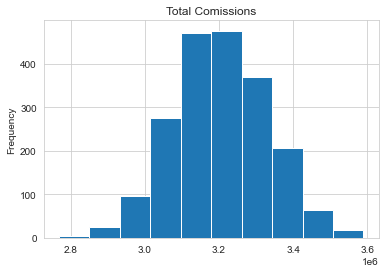

In [47]:
results_df["Total Comission"].plot(kind = "hist", title= "Total Comissions" )